In [124]:
import os
import json
import wandb
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')

from utils.training_dynamic_utils import plot_datamap, get_data_points_from_indices, get_data_subset
from utils.wandb_utils import *
from utils.dataset_utils import get_train_val_test_sets

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
os.environ["WANDB_NOTEBOOK_NAME"] = 'analysis.ipynb'
wandb.login()
sns.set_style('whitegrid')
sns.set_palette('Set2')

### Check available pre-trained models

In [130]:
import torch
from pprint import pprint
pprint(torch.hub.list("chenyaofo/pytorch-cifar-models", force_reload=True))

Downloading: "https://github.com/chenyaofo/pytorch-cifar-models/zipball/master" to /home/timoh/.cache/torch/hub/master.zip


['cifar100_mobilenetv2_x0_5',
 'cifar100_mobilenetv2_x0_75',
 'cifar100_mobilenetv2_x1_0',
 'cifar100_mobilenetv2_x1_4',
 'cifar100_repvgg_a0',
 'cifar100_repvgg_a1',
 'cifar100_repvgg_a2',
 'cifar100_resnet20',
 'cifar100_resnet32',
 'cifar100_resnet44',
 'cifar100_resnet56',
 'cifar100_shufflenetv2_x0_5',
 'cifar100_shufflenetv2_x1_0',
 'cifar100_shufflenetv2_x1_5',
 'cifar100_shufflenetv2_x2_0',
 'cifar100_vgg11_bn',
 'cifar100_vgg13_bn',
 'cifar100_vgg16_bn',
 'cifar100_vgg19_bn',
 'cifar100_vit_b16',
 'cifar100_vit_b32',
 'cifar100_vit_h14',
 'cifar100_vit_l16',
 'cifar100_vit_l32',
 'cifar10_mobilenetv2_x0_5',
 'cifar10_mobilenetv2_x0_75',
 'cifar10_mobilenetv2_x1_0',
 'cifar10_mobilenetv2_x1_4',
 'cifar10_repvgg_a0',
 'cifar10_repvgg_a1',
 'cifar10_repvgg_a2',
 'cifar10_resnet20',
 'cifar10_resnet32',
 'cifar10_resnet44',
 'cifar10_resnet56',
 'cifar10_shufflenetv2_x0_5',
 'cifar10_shufflenetv2_x1_0',
 'cifar10_shufflenetv2_x1_5',
 'cifar10_shufflenetv2_x2_0',
 'cifar10_vgg11_bn

### Setup

In [60]:
project_name = 'L46_datamaps'
entity_name = 'l46_datamaps'
run_name = 'run_20231228_133927' # 'run_20231227_202847' # 'run_20231227_122900' #'run_20231223_161559'

In [61]:
gold_label_probabilities, confidence, variability, correctness, forgetfulness = get_training_dynamics_from_run_name(project_name, entity_name, run_name)

### Datamap Plotting

In [47]:
len(gold_label_probabilities)

40000

#### Resnet Small Overtrained for 12 epochs on cifar10

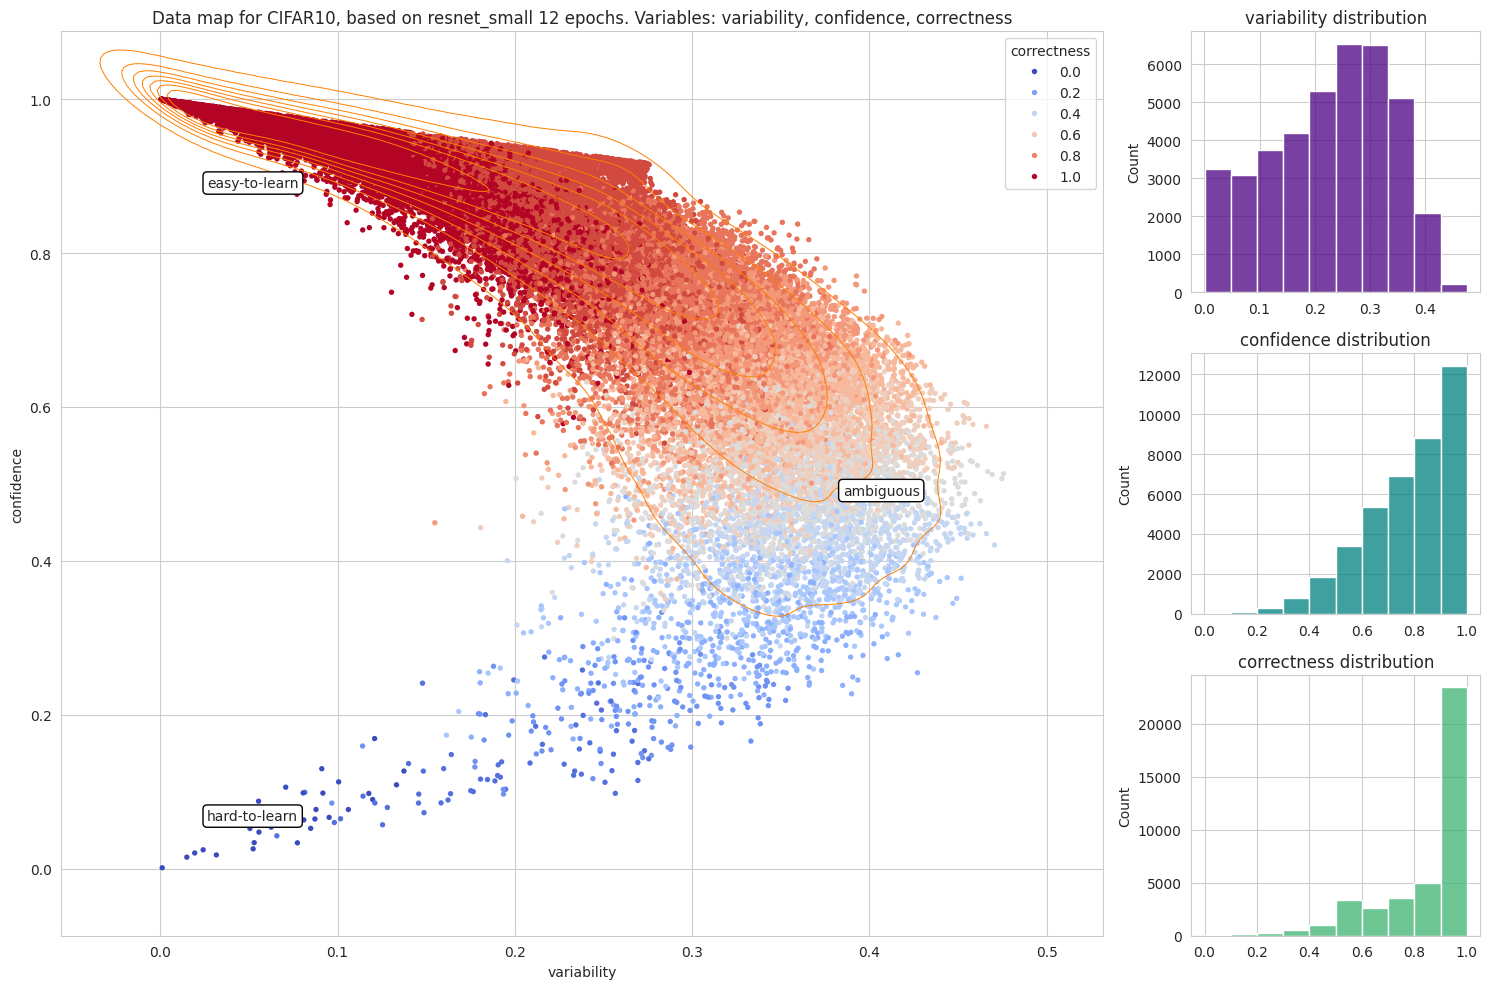

In [74]:
fig = plot_datamap(
    variability,
    confidence, 
    correctness,
    var1_name='variability',
    var2_name='confidence',
    var3_name='correctness',
    dataset_name='cifar10',
    model_name='resnet_small 12 epochs'
)

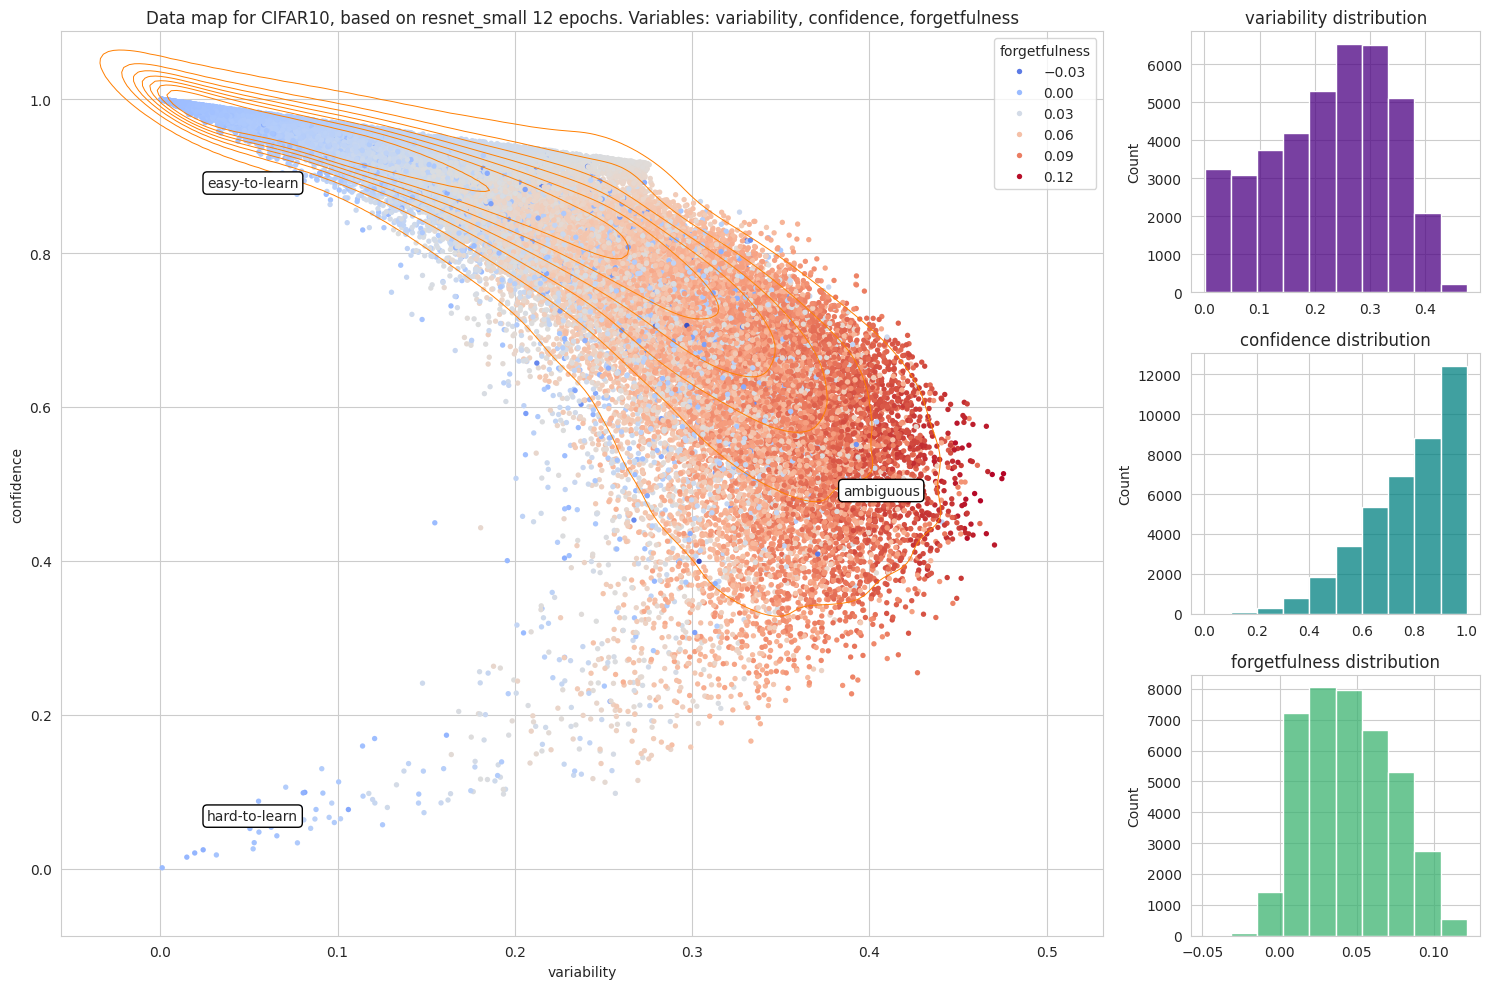

In [75]:
fig = plot_datamap(
    variability,
    confidence, 
    forgetfulness,
    var1_name='variability',
    var2_name='confidence',
    var3_name='forgetfulness',
    dataset_name='cifar10',
    model_name='resnet_small 12 epochs'
)

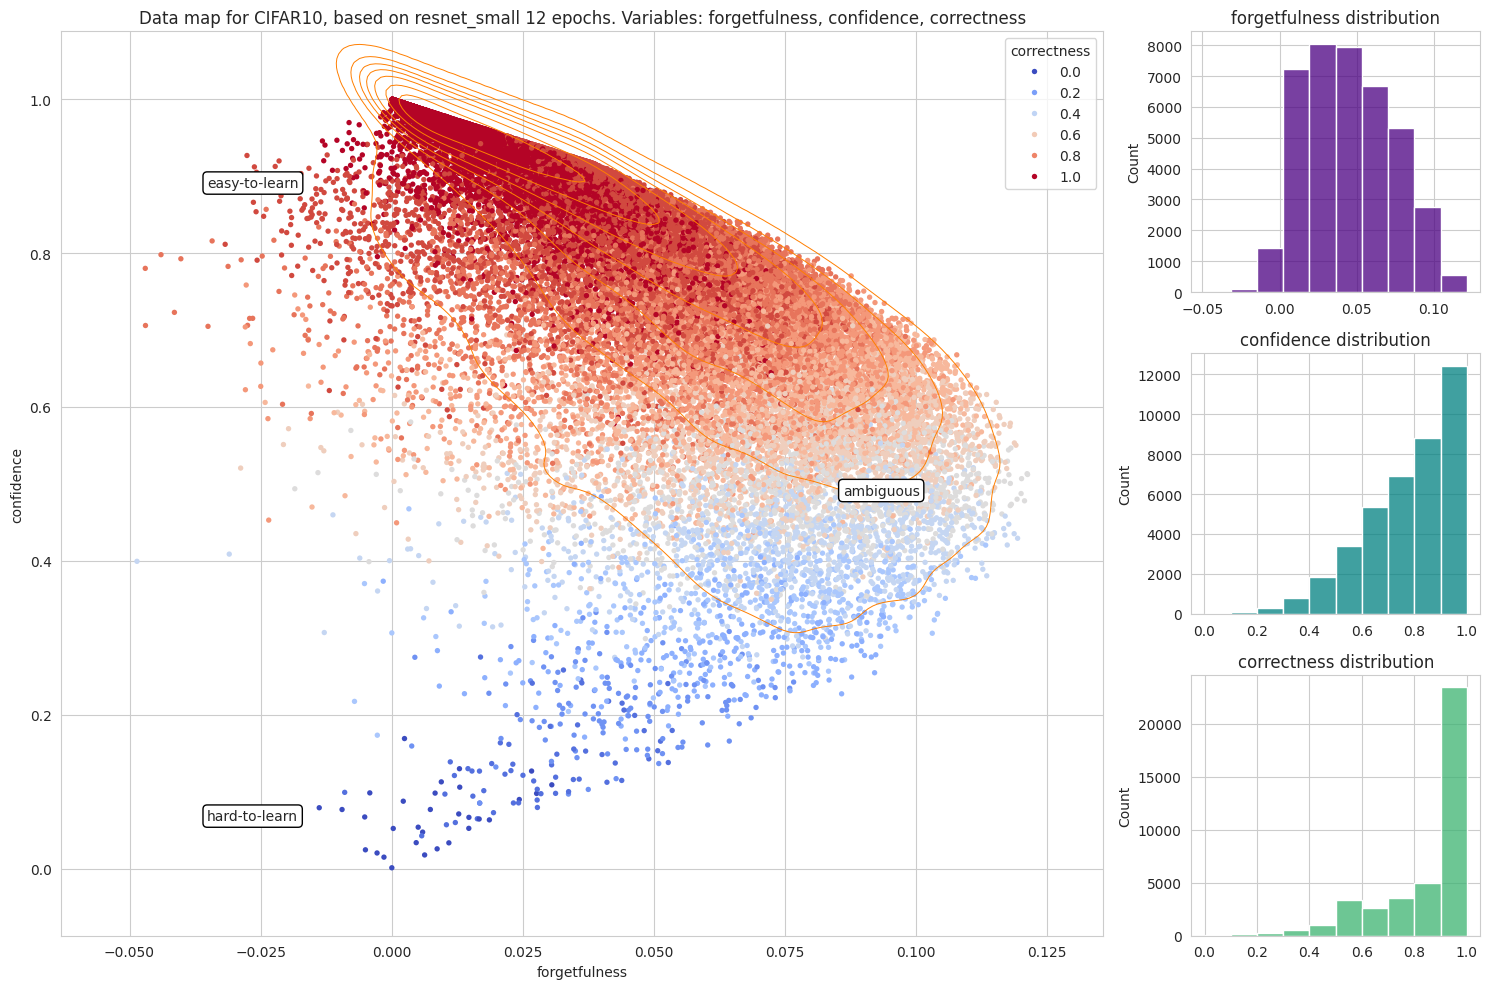

In [76]:
fig = plot_datamap(
    forgetfulness,
    confidence, 
    correctness,
    var1_name='forgetfulness',
    var2_name='confidence',
    var3_name='correctness',
    dataset_name='cifar10',
    model_name='resnet_small 12 epochs'
)

#### Resnet Medium 3 epochs cifar10

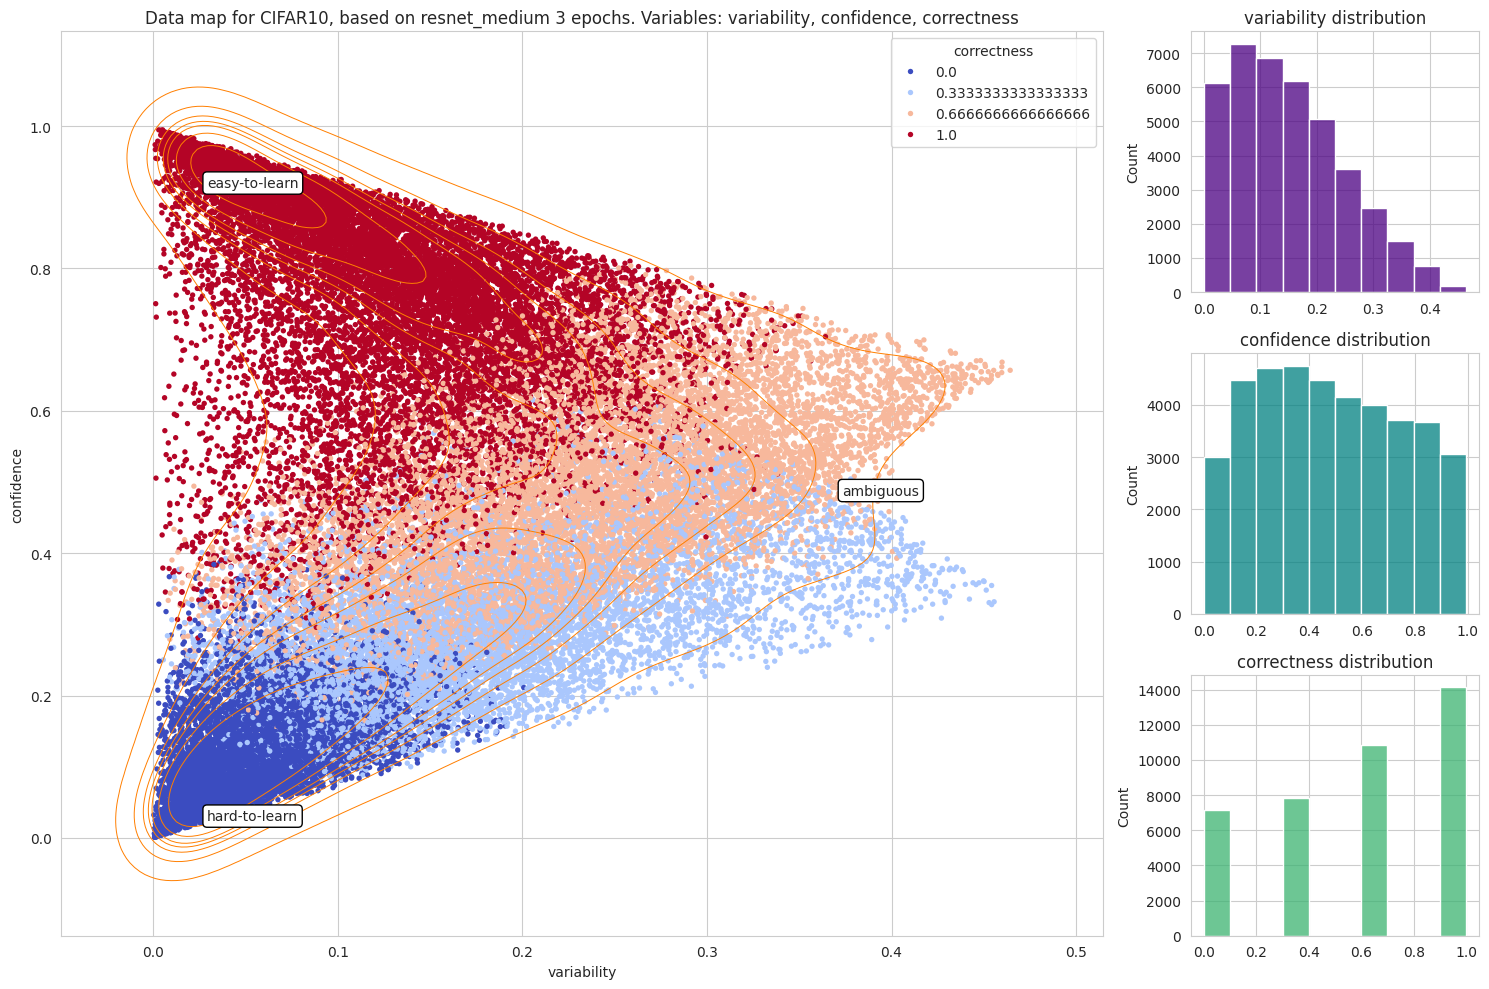

In [48]:
fig2 = plot_datamap(
    variability,
    confidence, 
    correctness,
    var1_name='variability',
    var2_name='confidence',
    var3_name='correctness',
    dataset_name='cifar10',
    model_name='resnet_medium 3 epochs'
)

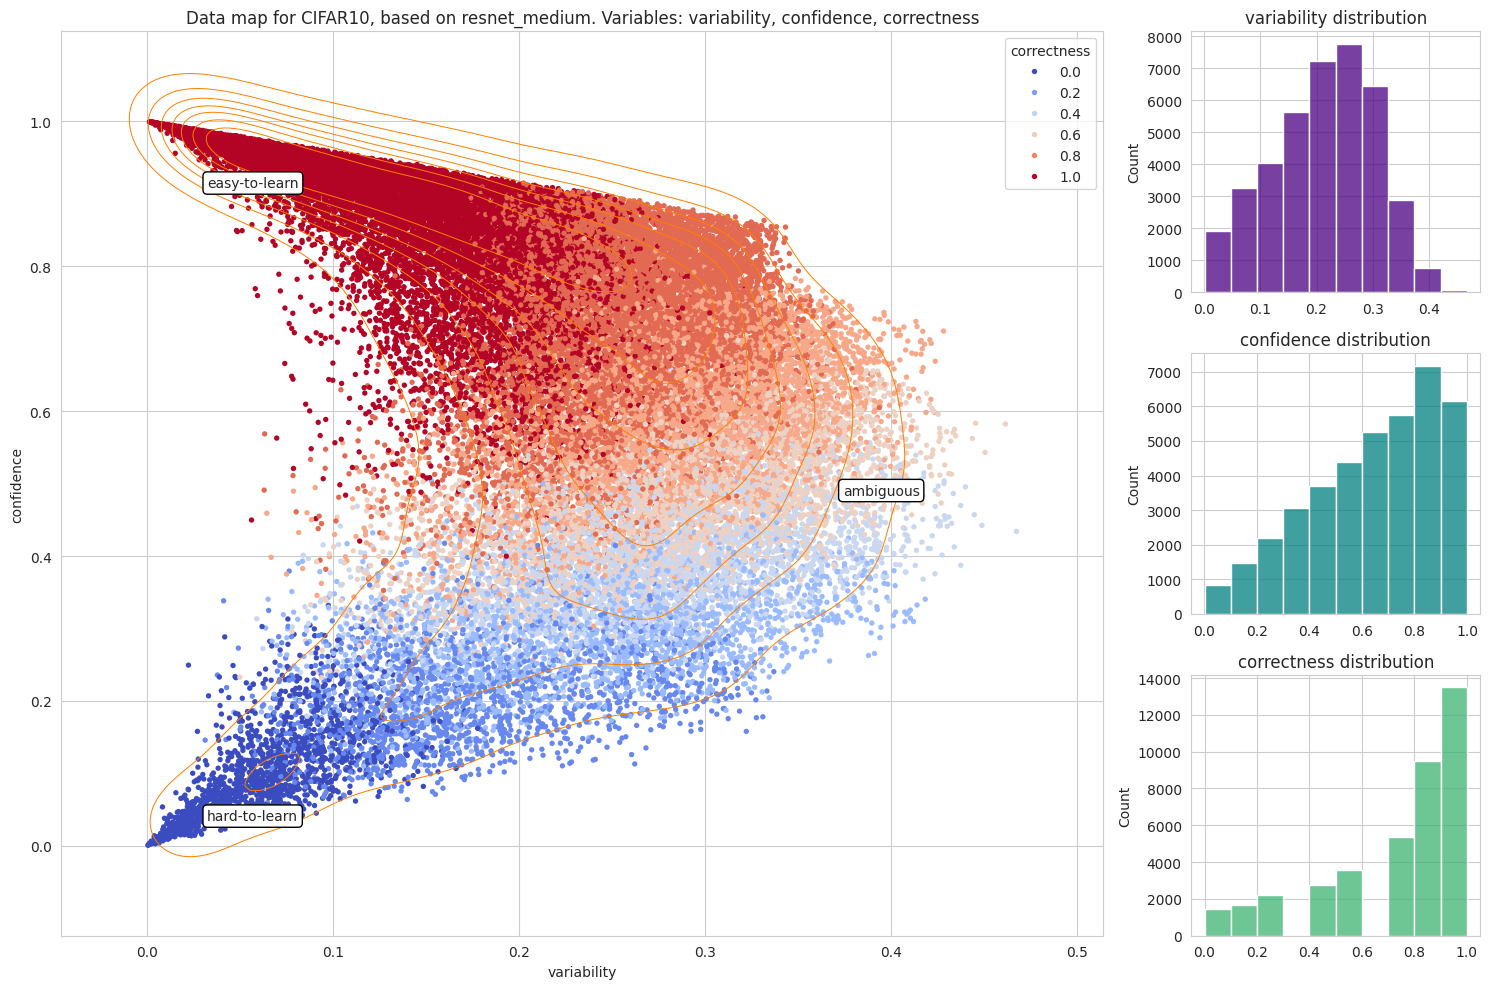

In [6]:
fig1 = plot_datamap(
    variability,
    confidence, 
    correctness,
    dataset_name='cifar10',
    model_name='resnet_medium'
)

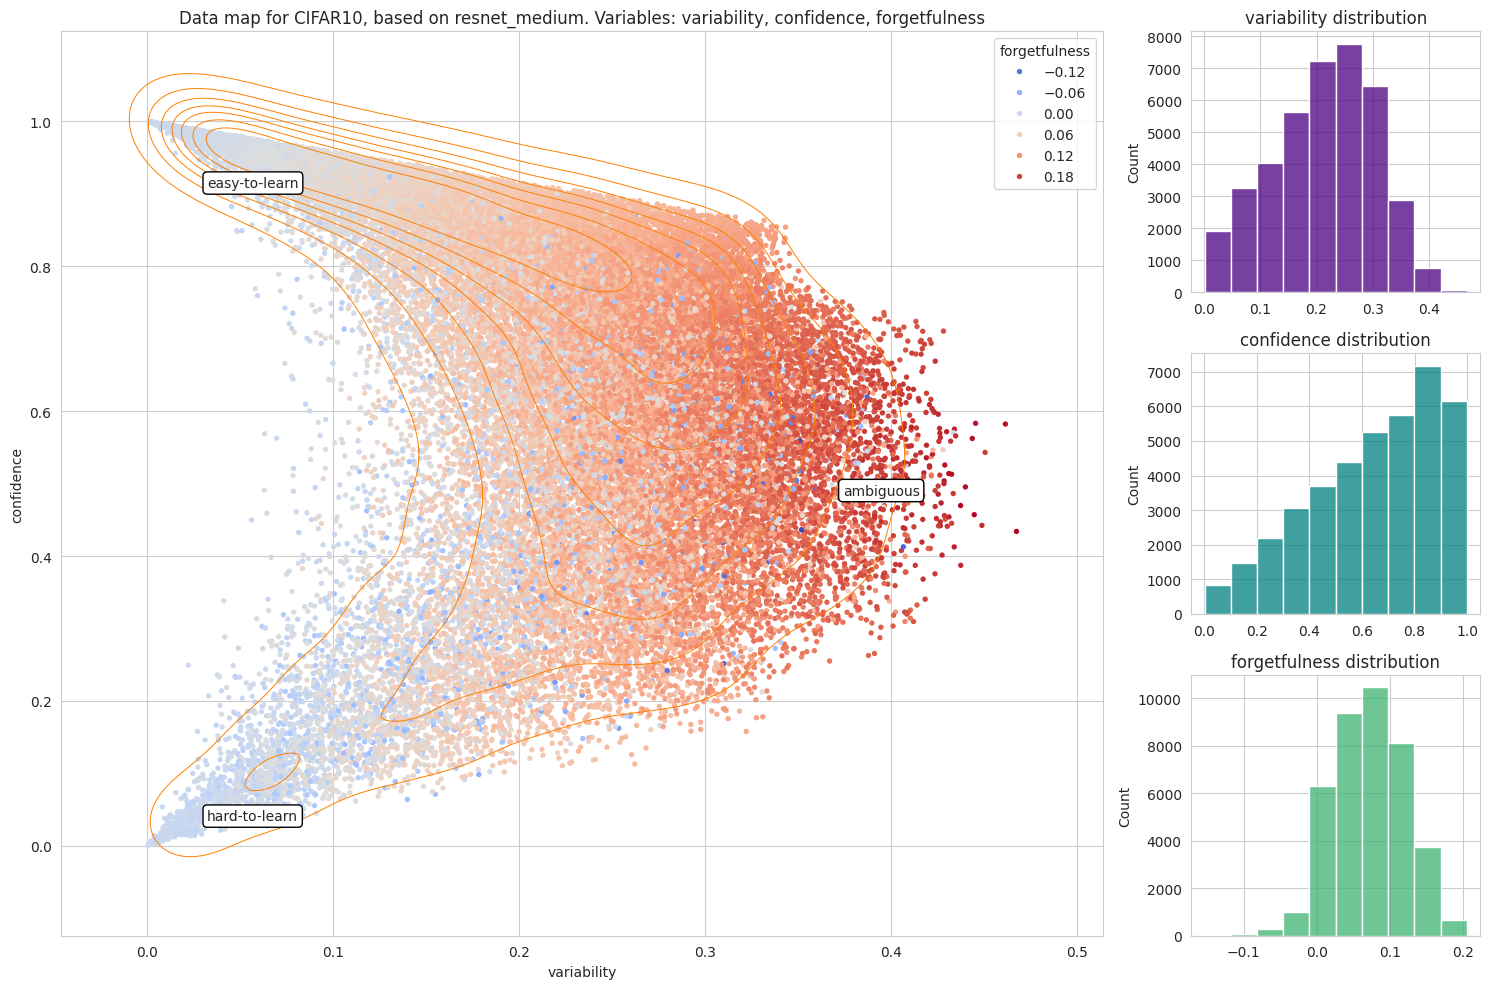

In [7]:
fig2 = plot_datamap(
    variability,
    confidence, 
    forgetfulness,
    var1_name='variability',
    var2_name='confidence',
    var3_name='forgetfulness',
    dataset_name='cifar10',
    model_name='resnet_medium'
)

### Data Point Visualization

In [77]:
val_split_seed = get_val_split_seed_from_run_name(run_name, project_name, entity_name)

In [78]:
val_split_seed

42

In [79]:
train_cifar10, _, _ = get_train_val_test_sets('cifar10', val_split_seed, run_name)
train_cifar10_full, _ = get_train_val_test_sets('cifar10', val_split_seed, run_name, keep_full=True)

INFO:utils/dataset_utils.py:Fetching train, val, and test sets according to args. dataset_name: cifar10 | val_split_seed: 42 | prev_run_name_for_dynamics: run_20231228_133927


Files already downloaded and verified


INFO:utils/dataset_utils.py:Fetching train, val, and test sets according to args. dataset_name: cifar10 | val_split_seed: 42 | prev_run_name_for_dynamics: run_20231228_133927


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [122]:
data_indices = get_data_subset(
    range(len(train_cifar10)),
    variability,
    confidence,
    correctness,
    forgetfulness,
    # p_easytolearn=0.0001
    p_hardtolearn=0.00088,
    # p_forgetfulness=0.0005,
    # p_ambiguous=0.0005
    # selector_forgetfulness='bottom'
)

indent = 12
for di in data_indices:
    print(f'di#{di: <12}: {gold_label_probabilities[di]}')
    print(f'{"confidence": <15}: {confidence[di]}')
    print(f'{"variability": <15}: {variability[di]}')
    print(f'{"correctness": <15}: {correctness[di]}')
    print(f'{"forgetfulness": <15}: {forgetfulness[di]}\n\n')

Fetching indices of specified training dynamics subset.
di#35969       : [0.02102258801460266, 0.002045018132776022, 0.04765522480010986, 0.06055597960948944, 0.02213151939213276, 0.008555114269256592, 0.008097766898572445, 0.11546885967254639, 0.03717159852385521, 0.011907815001904964, 0.30546966195106506, 0.3850138187408447]
confidence     : 0.08542457967996597
variability    : 0.12105383723974228
correctness    : 0.08333333333333333
forgetfulness  : 0.023241700111217536


di#7299        : [0.010387993417680264, 0.00851327646523714, 0.03462278097867966, 0.08838632702827454, 0.055096834897994995, 0.019106563180685043, 0.0048592290841042995, 0.06242653727531433, 0.001852540299296379, 0.13716964423656464, 0.022700900211930275, 0.3556464612483978]
confidence     : 0.06673076003789902
variability    : 0.09526079148054123
correctness    : 0.0
forgetfulness  : 0.01474976448270564


di#14339       : [0.017087876796722412, 0.012297294102609158, 0.016721418127417564, 0.002293069614097476, 0.00

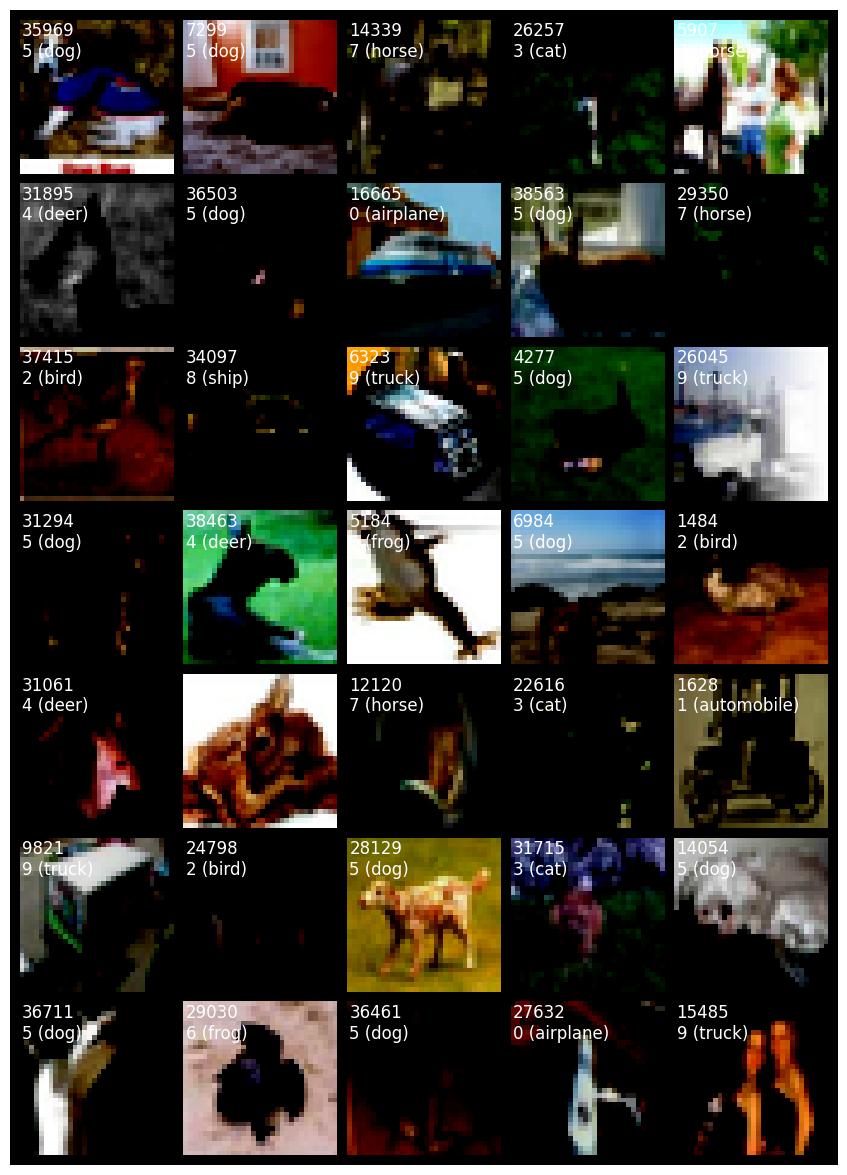

In [123]:
cifar10_classes = train_cifar10_full.classes
data_points = get_data_points_from_indices(data_indices, train_cifar10, cifar10_classes, pretty_display=True)

In [93]:
data_indices = get_data_subset(
    range(len(train_cifar10)),
    variability,
    confidence,
    correctness,
    forgetfulness,
    p_hardtolearn=0.0006
)

Fetching indices of specified training dynamics subset.


In [94]:
data_points = get_data_points_from_indices(data_indices, train_cifar10, pretty_display=True)

TypeError: get_data_points_from_indices() missing 1 required positional argument: 'classes'

### Testing if Subset creation is correct